In [1]:
!pip install xgboost
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
import pandas as pd
df = pd.read_csv('C:\\Users\\SUSNATA BISWAS\\OneDrive\\Desktop\\UAV.csv')

In [4]:
df.head(10)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,uvindex,severerisk,conditions,icon,stations,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,"Birmingham, England, United Kingdom",6/1/2022,8.5,8,6.7,88.53,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",69.0,0.281703,22.382043,2.566546,24.11447322
1,"Birmingham, England, United Kingdom",6/1/2022,6.8,6.8,6.3,96.41,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",340.0,-0.900007,28.187742,10.483025,22.11221897
2,"Birmingham, England, United Kingdom",6/1/2022,6.2,6.2,5.8,97.67,0,0,NaN,0,...,0,10,Clear,clear-night,"03529099999,03414099999,EGBB,03535099999,03534...",266.0,-0.688493,29.375444,1.553021,24.97105023
3,"Birmingham, England, United Kingdom",6/1/2022,5.5,4.6,5.3,98.46,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",18.0,0.635886,23.710883,13.169636,26.51038418
4,"Birmingham, England, United Kingdom",6/1/2022,6,6,5.8,98.6,0,0,NaN,0,...,0,10,Overcast,cloudy,"03529099999,03414099999,EGBB,03535099999,03534...",35.0,0.526626,20.025423,14.554085,21.45772112
5,"Birmingham, England, United Kingdom",6/1/2022,7.1,7.1,7,98.95,0.02,100,rain,0,...,0,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",358.0,-0.908703,26.219584,11.742752,19.3975562
6,"Birmingham, England, United Kingdom",6/1/2022,8.4,7.3,8.2,98.81,0.02,100,rain,0,...,0,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",224.0,-0.661019,20.292279,12.470840,12.9191122
7,"Birmingham, England, United Kingdom",6/1/2022,9.4,8.9,8.8,96.14,0.02,100,rain,0,...,1,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",111.0,0.317224,23.896022,14.545962,23.90359735
8,"Birmingham, England, United Kingdom",6/1/2022,10.9,10.9,9,88.14,0.02,100,rain,0,...,2,10,"Rain, Partially cloudy",rain,"03529099999,EGBB,03647099999,03535099999,03534...",279.0,0.454431,20.007064,2.977960,25.38914851
9,"Birmingham, England, United Kingdom",6/1/2022,11,11,8.8,86.8,0.02,100,rain,0,...,2,10,"Rain, Overcast",rain,"03529099999,03414099999,EGBB,03647099999,03535...",360.0,0.346707,26.105161,5.923844,29.61544896


In [5]:
df.isnull().sum()

name                  0
datetime              0
temp                  0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
preciptype          448
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy         134
uvindex               0
severerisk            0
conditions            0
icon                  0
stations            364
Gap angle             1
cos(gap angle)        1
UAV Speed             0
UAV Payload           0
Final UAV Speed       0
dtype: int64

In [6]:
df.shape

(601, 29)

<AxesSubplot:xlabel='solarenergy', ylabel='Final UAV Speed'>

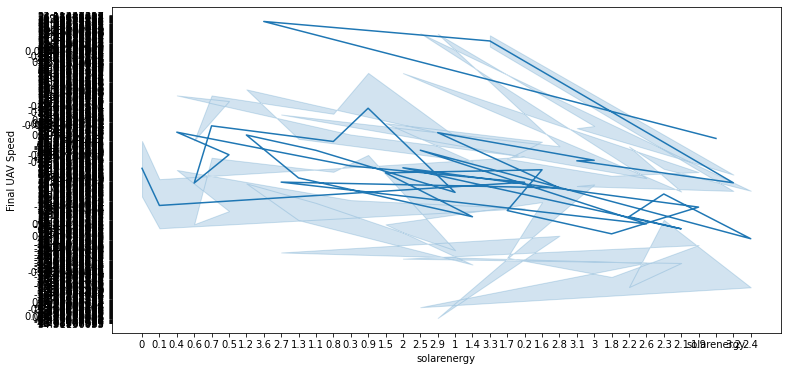

In [7]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "solarenergy", y = "Final UAV Speed", data = df)

In [8]:
df = df.drop(['name','datetime','stations','preciptype','precipprob','solarenergy'] , axis = 1)
df

,temp,feelslike,dew,humidity,precip,snow,snowdepth,windgust,windspeed,winddir,...,solarradiation,uvindex,severerisk,conditions,icon,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,8,6.7,88.53,0,0,0,7.90,5.40,270,...,0,0,10,Partially cloudy,partly-cloudy-night,69.0,0.281703,22.382043,2.566546,24.11447322
1,6.8,6.8,6.3,96.41,0,0,0,5.10,3.20,286,...,0,0,10,Partially cloudy,partly-cloudy-night,340.0,-0.900007,28.187742,10.483025,22.11221897
2,6.2,6.2,5.8,97.67,0,0,0,6.20,4.30,195,...,0,0,10,Clear,clear-night,266.0,-0.688493,29.375444,1.553021,24.97105023
3,5.5,4.6,5.3,98.46,0,0,0,8.90,5.30,192,...,0,0,10,Partially cloudy,partly-cloudy-night,18.0,0.635886,23.710883,13.169636,26.51038418
4,6,6,5.8,98.6,0,0,0,7.90,4.30,174,...,0,0,10,Overcast,cloudy,35.0,0.526626,20.025423,14.554085,21.45772112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,14.6,11.3,80.59,1.3,0,0,30.20,16.90,206.9,...,370,4,10,Overcast,cloudy,79.0,-0.784794,28.608596,4.485393,8.161947594
597,13.6,13.6,10.9,83.73,0,0,0,31.40,15.70,205.9,...,272.3,3,10,Partially cloudy,partly-cloudy-day,308.0,-0.715012,24.484307,3.080164,6.761283669
598,12.6,12.6,10.4,87.04,0,0,0,32.60,14.50,204.9,...,174.7,2,10,Partially cloudy,partly-cloudy-day,208.0,-0.109373,25.770818,5.489982,22.28967933
599,11.6,11.6,10.1,90.51,0.1,0,0,33.80,13.30,203.9,...,77,0,10,Clear,clear-night,205.0,-0.710821,27.896114,9.099070,10.33508325


In [9]:
df['Final UAV Speed'].describe()

count             601
unique            601
top       24.11447322
freq                1
Name: Final UAV Speed, dtype: object

In [10]:
df.isnull().sum()

temp                0
feelslike           0
dew                 0
humidity            0
precip              0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
uvindex             0
severerisk          0
conditions          0
icon                0
Gap angle           1
cos(gap angle)      1
UAV Speed           0
UAV Payload         0
Final UAV Speed     0
dtype: int64

In [11]:
df = df.dropna()
df

,temp,feelslike,dew,humidity,precip,snow,snowdepth,windgust,windspeed,winddir,...,solarradiation,uvindex,severerisk,conditions,icon,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,8,6.7,88.53,0,0,0,7.90,5.40,270,...,0,0,10,Partially cloudy,partly-cloudy-night,69.0,0.281703,22.382043,2.566546,24.11447322
1,6.8,6.8,6.3,96.41,0,0,0,5.10,3.20,286,...,0,0,10,Partially cloudy,partly-cloudy-night,340.0,-0.900007,28.187742,10.483025,22.11221897
2,6.2,6.2,5.8,97.67,0,0,0,6.20,4.30,195,...,0,0,10,Clear,clear-night,266.0,-0.688493,29.375444,1.553021,24.97105023
3,5.5,4.6,5.3,98.46,0,0,0,8.90,5.30,192,...,0,0,10,Partially cloudy,partly-cloudy-night,18.0,0.635886,23.710883,13.169636,26.51038418
4,6,6,5.8,98.6,0,0,0,7.90,4.30,174,...,0,0,10,Overcast,cloudy,35.0,0.526626,20.025423,14.554085,21.45772112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,14.6,11.3,80.59,1.3,0,0,30.20,16.90,206.9,...,370,4,10,Overcast,cloudy,79.0,-0.784794,28.608596,4.485393,8.161947594
597,13.6,13.6,10.9,83.73,0,0,0,31.40,15.70,205.9,...,272.3,3,10,Partially cloudy,partly-cloudy-day,308.0,-0.715012,24.484307,3.080164,6.761283669
598,12.6,12.6,10.4,87.04,0,0,0,32.60,14.50,204.9,...,174.7,2,10,Partially cloudy,partly-cloudy-day,208.0,-0.109373,25.770818,5.489982,22.28967933
599,11.6,11.6,10.1,90.51,0.1,0,0,33.80,13.30,203.9,...,77,0,10,Clear,clear-night,205.0,-0.710821,27.896114,9.099070,10.33508325


In [12]:
df.isnull().sum()

temp                0
feelslike           0
dew                 0
humidity            0
precip              0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
uvindex             0
severerisk          0
conditions          0
icon                0
Gap angle           0
cos(gap angle)      0
UAV Speed           0
UAV Payload         0
Final UAV Speed     0
dtype: int64

In [13]:
df.dtypes

temp                 object
feelslike            object
dew                  object
humidity             object
precip               object
snow                 object
snowdepth            object
windgust             object
windspeed            object
winddir              object
sealevelpressure     object
cloudcover           object
visibility           object
solarradiation       object
uvindex              object
severerisk           object
conditions           object
icon                 object
Gap angle           float64
cos(gap angle)      float64
UAV Speed           float64
UAV Payload         float64
Final UAV Speed      object
dtype: object

In [14]:
df['temp'] = pd.to_numeric(df['temp'])
df['dew'] = pd.to_numeric(df['dew'])
df['humidity'] = pd.to_numeric(df['humidity'])
df['precip'] = pd.to_numeric(df['precip'])
df['windspeed'] = pd.to_numeric(df['windspeed'])
df['sealevelpressure'] = pd.to_numeric(df['sealevelpressure'])
df['solarradiation'] = pd.to_numeric(df['solarradiation'])
df['uvindex'] = pd.to_numeric(df['uvindex'])

In [15]:
df.dtypes

temp                float64
feelslike            object
dew                 float64
humidity            float64
precip              float64
snow                 object
snowdepth            object
windgust             object
windspeed           float64
winddir              object
sealevelpressure    float64
cloudcover           object
visibility           object
solarradiation      float64
uvindex               int64
severerisk           object
conditions           object
icon                 object
Gap angle           float64
cos(gap angle)      float64
UAV Speed           float64
UAV Payload         float64
Final UAV Speed      object
dtype: object

In [16]:
df1 = df.drop(['snow','snowdepth','Gap angle','feelslike'], axis = 1)
df1

,temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,icon,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,88.53,0.0,7.90,5.4,270,1014.4,28.1,19.7,0.0,0,10,Partially cloudy,partly-cloudy-night,0.281703,22.382043,2.566546,24.11447322
1,6.8,6.3,96.41,0.0,5.10,3.2,286,1015.0,20.5,16.6,0.0,0,10,Partially cloudy,partly-cloudy-night,-0.900007,28.187742,10.483025,22.11221897
2,6.2,5.8,97.67,0.0,6.20,4.3,195,1015.1,4.4,12.1,0.0,0,10,Clear,clear-night,-0.688493,29.375444,1.553021,24.97105023
3,5.5,5.3,98.46,0.0,8.90,5.3,192,1015.0,28.7,10.1,0.0,0,10,Partially cloudy,partly-cloudy-night,0.635886,23.710883,13.169636,26.51038418
4,6.0,5.8,98.60,0.0,7.90,4.3,174,1014.4,92.3,13.1,0.0,0,10,Overcast,cloudy,0.526626,20.025423,14.554085,21.45772112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,80.59,1.3,30.20,16.9,206.9,1001.0,99.7,10,370.0,4,10,Overcast,cloudy,-0.784794,28.608596,4.485393,8.161947594
597,13.6,10.9,83.73,0.0,31.40,15.7,205.9,1001.3,73.1,14.7,272.3,3,10,Partially cloudy,partly-cloudy-day,-0.715012,24.484307,3.080164,6.761283669
598,12.6,10.4,87.04,0.0,32.60,14.5,204.9,1001.7,46.6,19.4,174.7,2,10,Partially cloudy,partly-cloudy-day,-0.109373,25.770818,5.489982,22.28967933
599,11.6,10.1,90.51,0.1,33.80,13.3,203.9,1002.0,20,24.1,77.0,0,10,Clear,clear-night,-0.710821,27.896114,9.099070,10.33508325


In [17]:
df1.dtypes

temp                float64
dew                 float64
humidity            float64
precip              float64
windgust             object
windspeed           float64
winddir              object
sealevelpressure    float64
cloudcover           object
visibility           object
solarradiation      float64
uvindex               int64
severerisk           object
conditions           object
icon                 object
cos(gap angle)      float64
UAV Speed           float64
UAV Payload         float64
Final UAV Speed      object
dtype: object

In [18]:
df1['windspeed'].describe()

count    600.000000
mean      14.353667
std        6.067516
min        0.100000
25%        9.550000
50%       14.900000
75%       18.725000
max       29.500000
Name: windspeed, dtype: float64

<AxesSubplot:xlabel='temp', ylabel='Final UAV Speed'>

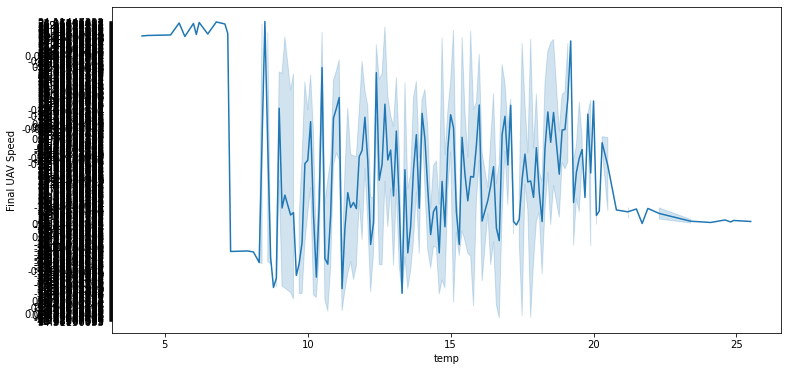

In [19]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "temp", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='dew', ylabel='Final UAV Speed'>

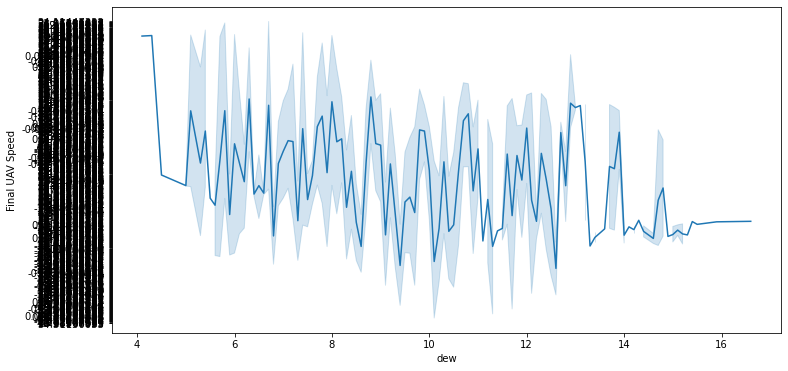

In [20]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "dew", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='humidity', ylabel='Final UAV Speed'>

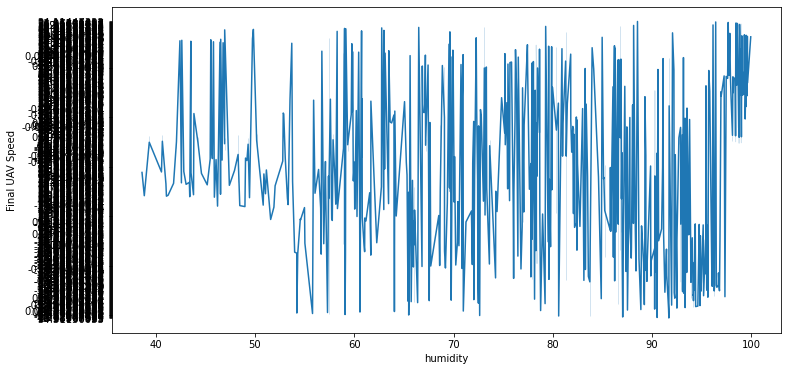

In [21]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "humidity", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='precip', ylabel='Final UAV Speed'>

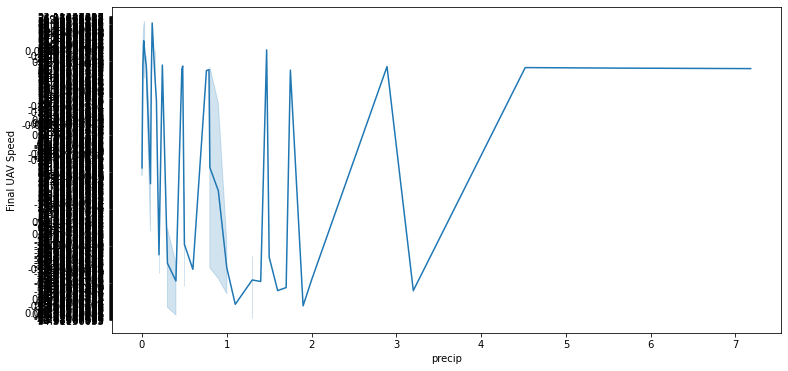

In [22]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "precip", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='windgust', ylabel='Final UAV Speed'>

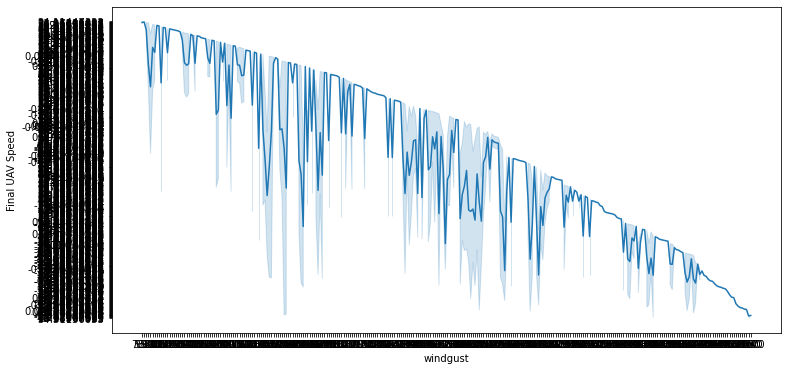

In [23]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "windgust", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='windspeed', ylabel='Final UAV Speed'>

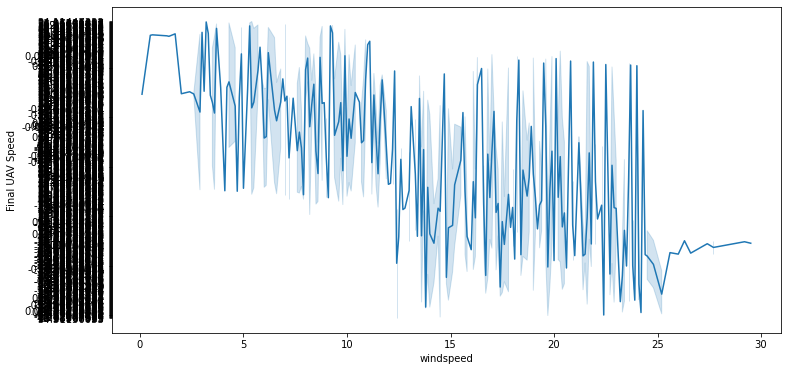

In [24]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "windspeed", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='winddir', ylabel='Final UAV Speed'>

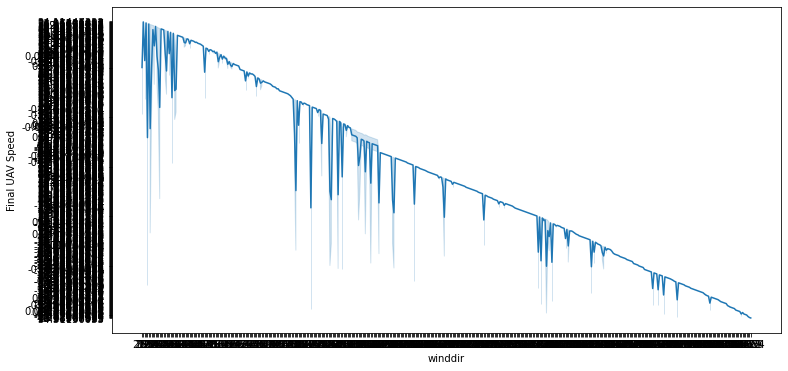

In [25]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "winddir", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='sealevelpressure', ylabel='Final UAV Speed'>

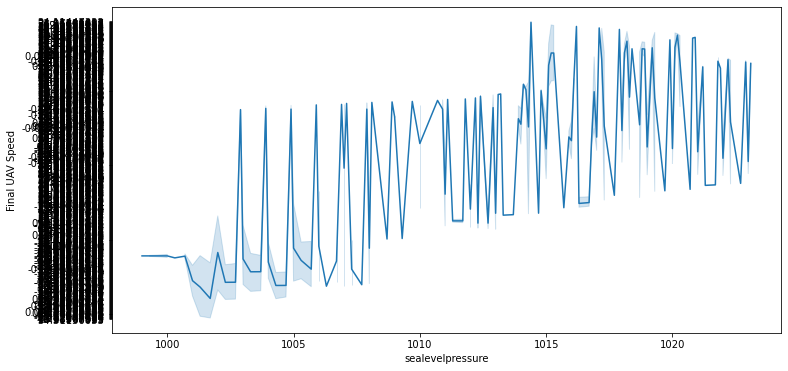

In [26]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "sealevelpressure", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='cloudcover', ylabel='Final UAV Speed'>

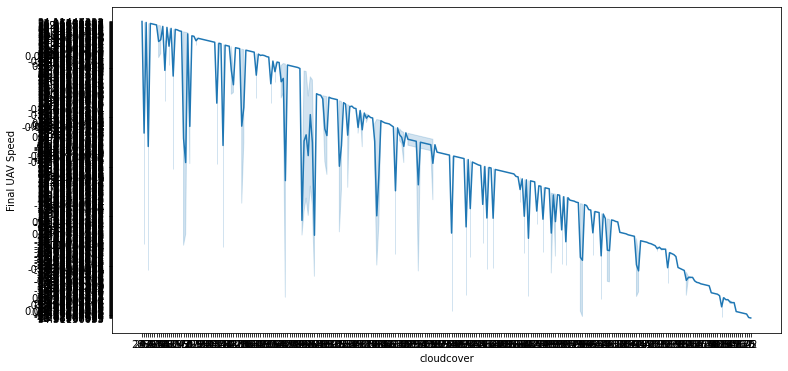

In [27]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "cloudcover", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='visibility', ylabel='Final UAV Speed'>

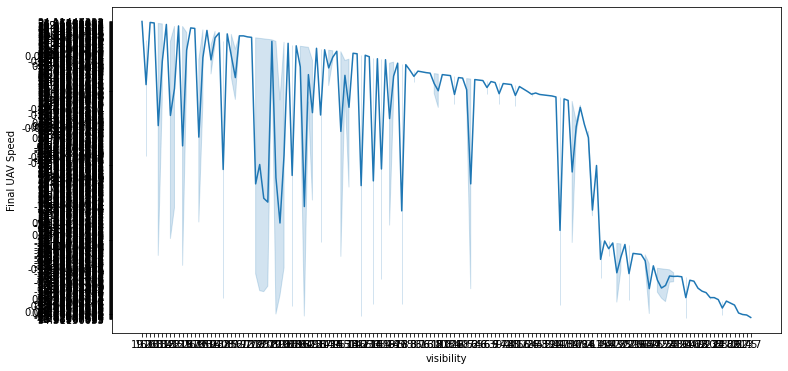

In [28]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "visibility", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='solarradiation', ylabel='Final UAV Speed'>

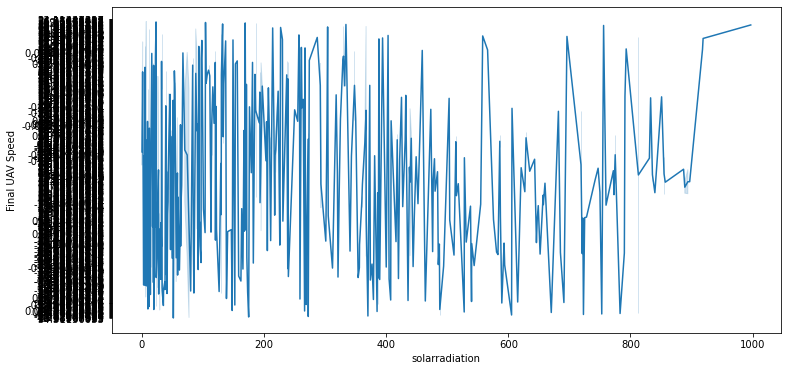

In [29]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "solarradiation", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='uvindex', ylabel='Final UAV Speed'>

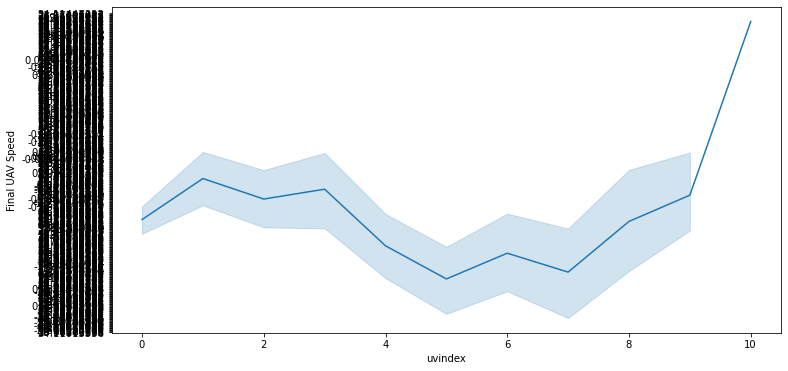

In [30]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "uvindex", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='severerisk', ylabel='Final UAV Speed'>

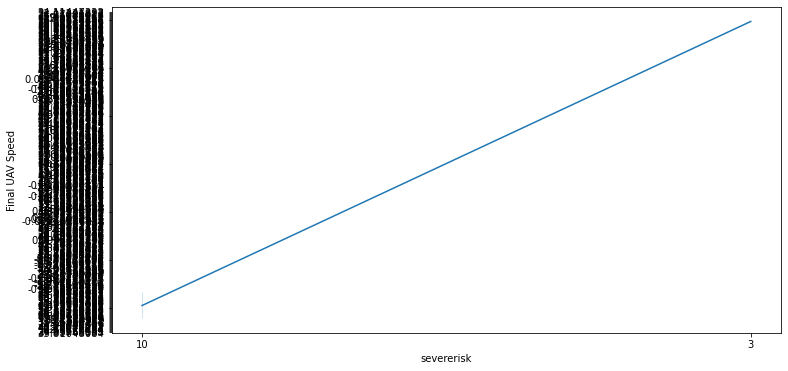

In [31]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "severerisk", y = "Final UAV Speed", data = df1)

C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


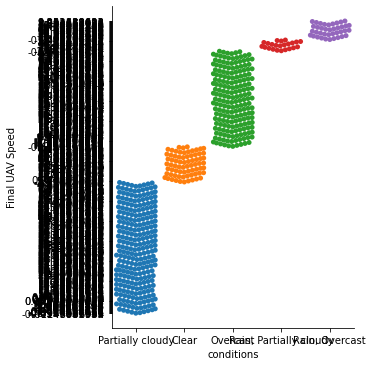

In [32]:
matplotlib.rcParams['figure.figsize'] = (100,50)
# sns.lineplot(x = "conditions", y = "Final UAV Speed", data = df1)
sns.catplot(x = "conditions", y = "Final UAV Speed", kind="swarm", data=df1)

C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\seaborn\categori

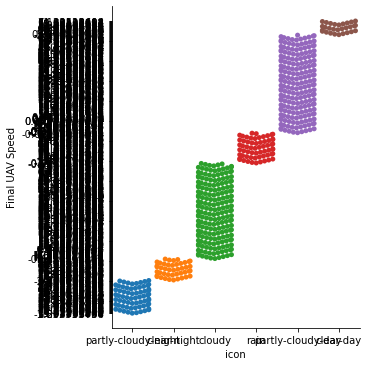

In [33]:
matplotlib.rcParams['figure.figsize'] = (35,25)
# sns.lineplot(x = "conditions", y = "Final UAV Speed", data = df1)
sns.catplot(x = "icon", y = "Final UAV Speed", kind="swarm", data=df1)

<AxesSubplot:xlabel='icon', ylabel='Final UAV Speed'>

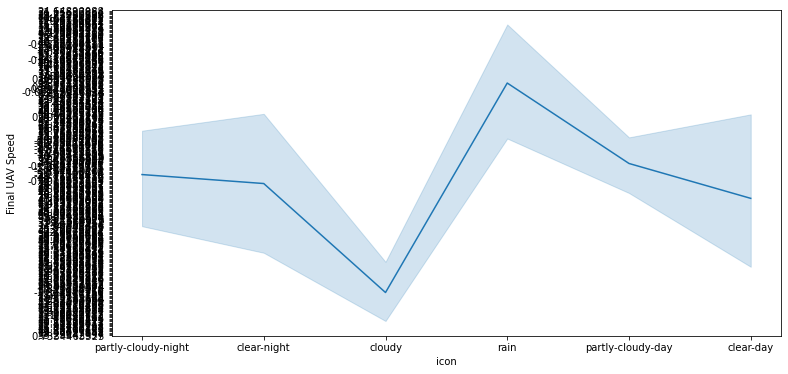

In [34]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "icon", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='cos(gap angle)', ylabel='Final UAV Speed'>

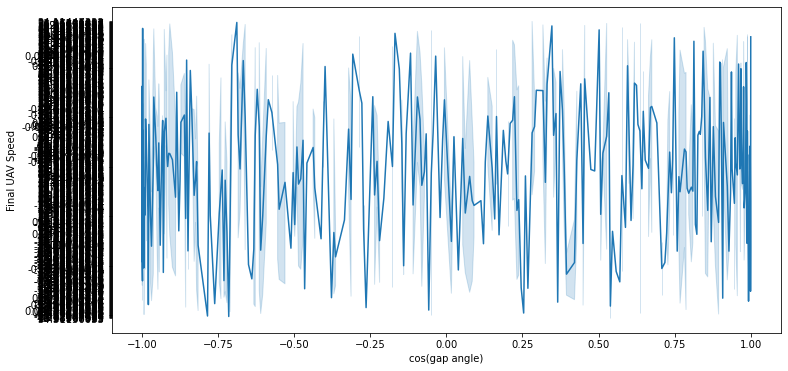

In [35]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "cos(gap angle)", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='UAV Speed', ylabel='Final UAV Speed'>

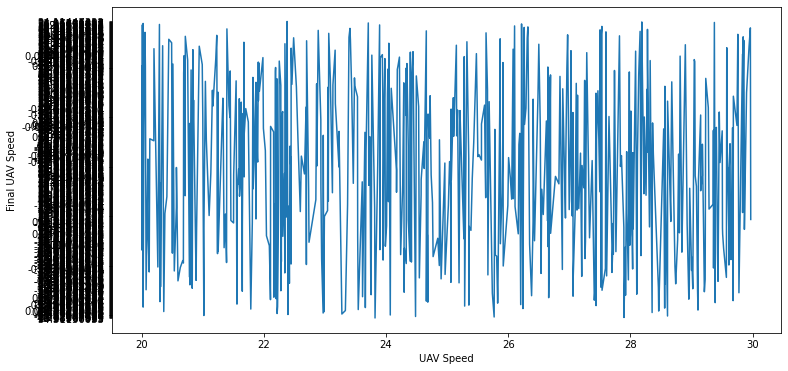

In [36]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "UAV Speed", y = "Final UAV Speed", data = df1)

<AxesSubplot:xlabel='UAV Payload', ylabel='Final UAV Speed'>

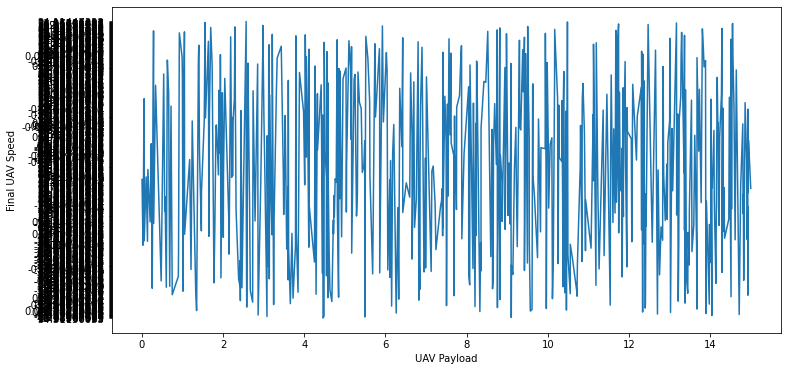

In [37]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.lineplot(x = "UAV Payload", y = "Final UAV Speed", data = df1)

In [38]:
df2 = df1.drop(['icon','severerisk','winddir','cloudcover'], axis = 1)
df2

,temp,dew,humidity,precip,windgust,windspeed,sealevelpressure,visibility,solarradiation,uvindex,conditions,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,88.53,0.0,7.90,5.4,1014.4,19.7,0.0,0,Partially cloudy,0.281703,22.382043,2.566546,24.11447322
1,6.8,6.3,96.41,0.0,5.10,3.2,1015.0,16.6,0.0,0,Partially cloudy,-0.900007,28.187742,10.483025,22.11221897
2,6.2,5.8,97.67,0.0,6.20,4.3,1015.1,12.1,0.0,0,Clear,-0.688493,29.375444,1.553021,24.97105023
3,5.5,5.3,98.46,0.0,8.90,5.3,1015.0,10.1,0.0,0,Partially cloudy,0.635886,23.710883,13.169636,26.51038418
4,6.0,5.8,98.60,0.0,7.90,4.3,1014.4,13.1,0.0,0,Overcast,0.526626,20.025423,14.554085,21.45772112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,80.59,1.3,30.20,16.9,1001.0,10,370.0,4,Overcast,-0.784794,28.608596,4.485393,8.161947594
597,13.6,10.9,83.73,0.0,31.40,15.7,1001.3,14.7,272.3,3,Partially cloudy,-0.715012,24.484307,3.080164,6.761283669
598,12.6,10.4,87.04,0.0,32.60,14.5,1001.7,19.4,174.7,2,Partially cloudy,-0.109373,25.770818,5.489982,22.28967933
599,11.6,10.1,90.51,0.1,33.80,13.3,1002.0,24.1,77.0,0,Clear,-0.710821,27.896114,9.099070,10.33508325


In [39]:
df2['visibility'] = pd.to_numeric(df2['visibility'])
df2['windgust'] = pd.to_numeric(df2['windgust'])
df2['Final UAV Speed'] = pd.to_numeric(df2['Final UAV Speed'])

In [40]:
df2.dtypes

temp                float64
dew                 float64
humidity            float64
precip              float64
windgust            float64
windspeed           float64
sealevelpressure    float64
visibility          float64
solarradiation      float64
uvindex               int64
conditions           object
cos(gap angle)      float64
UAV Speed           float64
UAV Payload         float64
Final UAV Speed     float64
dtype: object

In [41]:
df2.corr()

,temp,dew,humidity,precip,windgust,windspeed,sealevelpressure,visibility,solarradiation,uvindex,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
temp,1.000000,0.261018,-0.785527,-0.110631,0.300637,0.331592,0.088574,0.248875,0.653574,0.652344,-0.028072,0.001794,0.099909,-0.006683
dew,0.261018,1.000000,0.380681,0.051072,0.075662,0.155586,-0.246358,-0.232616,-0.182346,-0.200040,-0.081854,0.083590,0.007767,-0.063390
humidity,-0.785527,0.380681,1.000000,0.149401,-0.231986,-0.230858,-0.232820,-0.401711,-0.731311,-0.743307,-0.018234,0.044528,-0.093904,-0.029181
precip,-0.110631,0.051072,0.149401,1.000000,0.014675,0.109004,-0.073379,-0.210414,-0.042638,-0.040991,0.024418,0.035949,-0.048133,0.033613
windgust,0.300637,0.075662,-0.231986,0.014675,1.000000,0.796842,-0.318515,0.339534,0.192161,0.201843,-0.016664,0.033437,0.042833,-0.011551
windspeed,0.331592,0.155586,-0.230858,0.109004,0.796842,1.000000,-0.441796,0.230432,0.296528,0.307474,0.012405,0.026913,0.042183,0.028862
sealevelpressure,0.088574,-0.246358,-0.232820,-0.073379,-0.318515,-0.441796,1.000000,-0.009874,0.021055,0.025820,0.107674,-0.034928,-0.047790,0.084504
visibility,0.248875,-0.232616,-0.401711,-0.210414,0.339534,0.230432,-0.009874,1.000000,0.185789,0.195437,0.021539,0.038812,0.039751,0.036174
solarradiation,0.653574,-0.182346,-0.731311,-0.042638,0.192161,0.296528,0.021055,0.185789,1.000000,0.990703,0.045452,-0.010306,0.069064,0.040119
uvindex,0.652344,-0.200040,-0.743307,-0.040991,0.201843,0.307474,0.025820,0.195437,0.990703,1.000000,0.038399,-0.014249,0.066619,0.034836


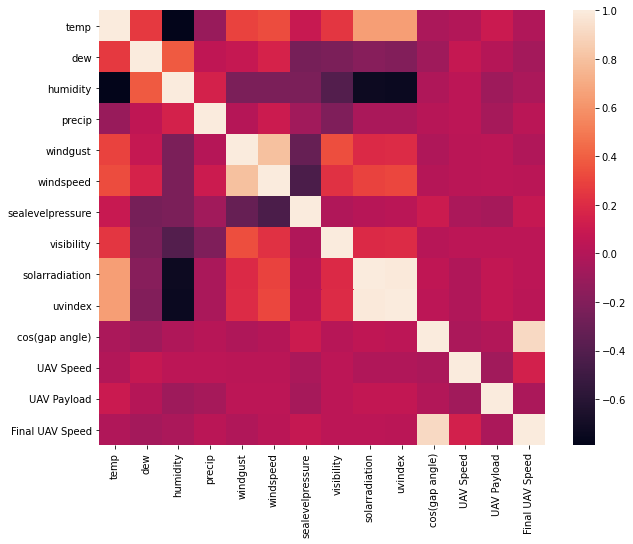

In [42]:
corr_mat_df2 = df2.corr().round(2)
corr_mat_df2

plt.figure(figsize = (10,8))
plot = sns.heatmap(df2.corr().round(2))

In [43]:
df3 = df2.drop(['sealevelpressure','humidity','solarradiation','uvindex'], axis = 1)
df3

,temp,dew,precip,windgust,windspeed,visibility,conditions,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,0.0,7.9,5.4,19.7,Partially cloudy,0.281703,22.382043,2.566546,24.114473
1,6.8,6.3,0.0,5.1,3.2,16.6,Partially cloudy,-0.900007,28.187742,10.483025,22.112219
2,6.2,5.8,0.0,6.2,4.3,12.1,Clear,-0.688493,29.375444,1.553021,24.971050
3,5.5,5.3,0.0,8.9,5.3,10.1,Partially cloudy,0.635886,23.710883,13.169636,26.510384
4,6.0,5.8,0.0,7.9,4.3,13.1,Overcast,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,Overcast,-0.784794,28.608596,4.485393,8.161948
597,13.6,10.9,0.0,31.4,15.7,14.7,Partially cloudy,-0.715012,24.484307,3.080164,6.761284
598,12.6,10.4,0.0,32.6,14.5,19.4,Partially cloudy,-0.109373,25.770818,5.489982,22.289679
599,11.6,10.1,0.1,33.8,13.3,24.1,Clear,-0.710821,27.896114,9.099070,10.335083


In [44]:
df3['conditions'].unique()

array(['Partially cloudy', 'Clear', 'Overcast', 'Rain, Partially cloudy',
       'Rain, Overcast'], dtype=object)

In [45]:
one_hot_encoded_data = pd.get_dummies(df3, columns = ['conditions'])

In [46]:
one_hot_encoded_data.dtypes

temp                                 float64
dew                                  float64
precip                               float64
windgust                             float64
windspeed                            float64
visibility                           float64
cos(gap angle)                       float64
UAV Speed                            float64
UAV Payload                          float64
Final UAV Speed                      float64
conditions_Clear                       uint8
conditions_Overcast                    uint8
conditions_Partially cloudy            uint8
conditions_Rain, Overcast              uint8
conditions_Rain, Partially cloudy      uint8
dtype: object

In [47]:
X = one_hot_encoded_data[['temp','dew','precip','windgust','windspeed','visibility','cos(gap angle)','UAV Speed','UAV Payload','conditions_Clear','conditions_Overcast','conditions_Partially cloudy','conditions_Rain, Overcast','conditions_Rain, Partially cloudy']]
y = one_hot_encoded_data['Final UAV Speed']

In [48]:
X

,temp,dew,precip,windgust,windspeed,visibility,cos(gap angle),UAV Speed,UAV Payload,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,8.5,6.7,0.0,7.9,5.4,19.7,0.281703,22.382043,2.566546,0,0,1,0,0
1,6.8,6.3,0.0,5.1,3.2,16.6,-0.900007,28.187742,10.483025,0,0,1,0,0
2,6.2,5.8,0.0,6.2,4.3,12.1,-0.688493,29.375444,1.553021,1,0,0,0,0
3,5.5,5.3,0.0,8.9,5.3,10.1,0.635886,23.710883,13.169636,0,0,1,0,0
4,6.0,5.8,0.0,7.9,4.3,13.1,0.526626,20.025423,14.554085,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,-0.784794,28.608596,4.485393,0,1,0,0,0
597,13.6,10.9,0.0,31.4,15.7,14.7,-0.715012,24.484307,3.080164,0,0,1,0,0
598,12.6,10.4,0.0,32.6,14.5,19.4,-0.109373,25.770818,5.489982,0,0,1,0,0
599,11.6,10.1,0.1,33.8,13.3,24.1,-0.710821,27.896114,9.099070,1,0,0,0,0


In [49]:
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler()
# X = X.fit_transform(X_new)

In [50]:
y

0      24.114473
1      22.112219
2      24.971050
3      26.510384
4      21.457721
         ...    
596     8.161948
597     6.761284
598    22.289679
599    10.335083
600    34.311301
Name: Final UAV Speed, Length: 600, dtype: float64

In [51]:
# def q1(x):
#     return x.quantile(0.25)

# def q2(x):
#     return x.quantile(0.50)

# def q3(x):
#     return x.quantile(0.75)

# def q4(x):
#     return x.quantile(1.00)

# f = {'Final UAV Speed': [q1, q2,q3,q4]}


# df2.groupby('UAV Speed').agg(f)
# df2.groupby('UAV Payload').agg(f)
# df2.groupby('UAV Direction').agg(f)
# df2.groupby('ugrd10m').agg(f)
# df2.groupby('vgrd10m').agg(f)
# df2.groupby('Wind Direction').agg(f)
# df2.groupby('Wind speed').agg(f)
# df2.groupby('Gap Angle').agg(f)

# sns.pairplot(df2, hue="Final UAV Speed", height=3, diag_kind="kde")
# plt.show()

# matplotlib.rcParams['figure.figsize'] = (12,6)
# sns.boxplot(x = "UAV Speed", y = "Final UAV Speed", data = df1)

In [52]:
# X = df1[['UAV Speed','UAV Payload','vgrd10m','Wind speed','Gap Angle']]
# y = df1['Final UAV Speed']

In [53]:
# X

In [54]:
# values = X['Wind speed'] * X['Gap Angle']
# X['Wind Component'] = values
# X = X.drop(['Wind speed','Gap Angle'], axis = 1)
# X

In [55]:
!pip install evalml --user

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [57]:
xgbr = xgb.XGBRegressor(verbosity=0)

In [58]:
xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9999997367886779


In [60]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.99


In [60]:
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)

MSE: 2.73


In [61]:
y_pred

array([ 1.0643588e+01,  2.9356735e+01,  3.0847675e+01,  1.4562030e-02,
        4.8690147e+01,  4.8441868e+01,  1.8173242e+00,  3.9026638e+01,
        9.9505033e+00,  1.8596272e+01,  3.3397934e+01,  4.0133656e+01,
        4.0466499e+01, -1.5989310e+00,  1.5891571e+01,  4.8296410e+01,
        5.2180405e+01,  4.7935081e+01,  2.4366213e+01,  2.1559534e+01,
       -4.6235175e+00,  4.3359232e+00,  3.4768871e+01,  1.6654106e+01,
        8.2876110e+00,  2.8085003e+01,  4.1571980e+01,  5.1356621e+01,
        5.3332409e+01,  1.7786541e+01,  3.6674557e+01,  3.6884850e+01,
        7.6778431e+00,  1.1889052e+01,  1.8815569e+01,  4.6530800e+01,
        5.3984787e+01,  2.4725185e+01,  8.4652939e+00,  2.1883289e+01,
        2.0903532e+01,  3.1263899e+01,  1.2443613e+01,  2.0664589e+01,
        2.3089529e+01,  3.2994770e+01,  1.9076797e+01,  2.4450258e+01,
        2.4070327e+00,  2.9809134e+01,  3.2435402e+01,  5.4857803e+01,
        2.3268684e+01,  4.0337116e+01,  3.8146454e+01,  3.5473130e+00,
      

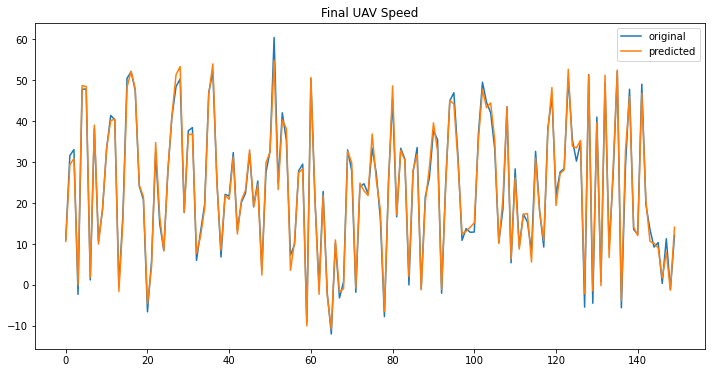

In [62]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Final UAV Speed")
plt.legend()
plt.show()

In [ ]:
import evalml
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='regression')

In [64]:
X_train

,temp,dew,precip,windgust,windspeed,visibility,cos(gap angle),UAV Speed,UAV Payload,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
118,10.2,10.0,0.11,6.1,5.9,2.6,-0.977357,29.847638,3.136633,0,0,0,1,0
363,12.9,8.7,0.00,23.2,10.2,24.1,0.113560,27.038719,7.381662,1,0,0,0,0
55,11.8,8.7,0.00,11.0,6.8,13.7,0.922935,20.202630,5.849795,0,0,1,0,0
90,14.9,8.8,0.00,36.1,24.0,16.6,0.804827,24.196641,4.266784,0,0,1,0,0
391,15.2,11.0,0.00,13.8,8.2,24.1,0.796195,26.574475,3.491316,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,19.3,7.3,0.00,55.4,22.0,24.1,-0.779544,25.355236,11.545762,0,0,1,0,0
9,11.0,8.8,0.02,14.6,9.2,23.2,0.346707,26.105161,5.923844,0,0,0,1,0
360,15.2,11.0,0.00,18.0,7.9,24.1,-0.950336,26.057486,6.759560,1,0,0,0,0
192,12.9,8.9,0.00,25.6,11.3,10.0,-0.991521,27.650454,12.202700,0,0,1,0,0


In [65]:
y_train

118    21.865258
363    27.569874
55     28.401389
90     50.581750
391    35.418425
         ...    
278    -5.277310
9      29.615449
360    12.808233
192     7.419575
560    53.951016
Name: Final UAV Speed, Length: 480, dtype: float64

In [66]:
import evalml
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [67]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='regression')
automl.search()

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.543e+02, tolerance: 9.359e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+03, tolerance: 9.655e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.498e+02, tolerance: 9.045e+00


In [68]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,XGBoost Regressor w/ Imputer + Select Columns ...,7,0.986373,0.003687,0.986373,8459.898063,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,4,Random Forest Regressor w/ Imputer + RF Regres...,4,0.975536,0.001997,0.975536,8368.047700,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,2,Random Forest Regressor w/ Imputer,2,0.974764,0.002121,0.974764,8361.501962,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,6,Extra Trees Regressor w/ Imputer + Select Colu...,6,0.974162,0.002256,0.974162,8356.402438,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,9,LightGBM Regressor w/ Imputer + Select Columns...,9,0.950834,0.002577,0.950834,8158.690048,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,5,Decision Tree Regressor w/ Imputer + Select Co...,5,0.944195,0.004595,0.944195,8102.417268,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,3,Elastic Net Regressor w/ Imputer + Standard Sc...,3,0.856153,0.003576,0.856153,7356.228719,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Elastic Net Regressor w/ Imputer + Standard Sc...,1,0.855819,0.002328,0.855819,7353.400731,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,8,CatBoost Regressor w/ Imputer + Select Columns...,8,0.328253,0.009860,0.328253,2882.070094,False,{'Imputer': {'categorical_impute_strategy': 'm...
9,0,Mean Baseline Regression Pipeline,0,-0.011799,0.010389,-0.011799,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}


In [69]:
best_pipeline = automl.best_pipeline
# best_pipeline.graph()
automl.best_pipeline

pipeline = RegressionPipeline(component_graph={'Imputer': ['Imputer', 'X', 'y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'y'], 'XGBoost Regressor': ['XGBoost Regressor', 'Select Columns Transformer.x', 'y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Select Columns Transformer':{'columns': ['temp', 'dew', 'windgust', 'windspeed', 'cos(gap angle)', 'UAV Speed', 'UAV Payload']}, 'XGBoost Regressor':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1}}, random_seed=0)

In [76]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*************************************************************
* XGBoost Regressor w/ Imputer + Select Columns Transformer *
*************************************************************

Problem Type: regression
Model Family: XGBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Select Columns Transformer
	 * columns : ['temp', 'dew', 'windgust', 'windspeed', 'cos(gap angle)', 'UAV Speed', 'UAV Payload']
3. XGBoost Regressor
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 0.6 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.988        0.988     7.341     1.135 3.384 1.403                    1.840        320      

In [71]:
best_pipeline=automl.best_pipeline
best_pipeline.score(X_train, y_train, objectives=["mse"])

OrderedDict([('MSE', 0.02500288733170199)])

In [72]:
best_pipeline=automl.best_pipeline
best_pipeline.score(X_test, y_test, objectives=["mse"])

OrderedDict([('MSE', 2.224897927093274)])